# **Project Name** - Phishing Classifier

#### **Project Type**  - Classification

# **Project Summary -**

#### **Project Description:**

#### The Phishing Attack Detection project is based on classification focus on developing machine learning model to detect wheter the phising(Attact) are done or not based details given or entered by the user.

#### **Objective:**

#### The primary goal of this project is develope a anit-phising model to efforts to block the phishing attack.

#### **Key Project Details:**

1. **URL Structure Analysis:**  
   Phishing URLs often contain abnormal patterns such as excessive use of special characters (e.g., ‘@’, ‘//’, or ‘-’), suspicious domain names, or long and complex URLs. These features can help in identifying malicious websites.

2. **Domain Features:**  
   Phishing domains often have a short lifespan, and many lack proper registration details (WHOIS data). Analyzing domain age and registrar information can be key indicators in phishing detection.

3. **Use of IP Addresses in URLs:**  
   Legitimate websites rarely use raw IP addresses in URLs, while phishing websites often do. Identifying this feature can improve detection accuracy.

4. **SSL Certificate Validity:**  
   Phishing sites either lack an SSL certificate or use a free or short-term certificate. Checking SSL certificate details can help differentiate between legitimate and phishing websites.

5. **Suspicious Keyword Detection:**  
   Phishing URLs frequently contain keywords like "login", "verify", "secure", or brand names (e.g., "paypal", "bank") to mislead users. Extracting and analyzing such keywords can be a strong phishing indicator.

6. **Redirection and Shortened URLs:**  
   Phishing websites often use multiple redirections or URL shorteners to disguise malicious links. Detecting excessive redirection can help flag potential phishing attempts.

# Problem Statement

#### Phishing is a type of fraud in which an attacker impersonates a reputable company or person in order to get sensitive information such as login credentials or account information via email or other communication channels. Phishing is popular among attackers because it is easier to persuade someone to click a malicious link that appears to be authentic than it is to break through a computer's protection measures.
#### The mail goal is to predict whether the domains are real or malicious.

#### **Objective**
#### The main objective of this project is build a classifier model which is capable to identify or  the phishing attack based on multiple criteria

# ***Let's Begin !***

# **1.Know The Data**

## Import Libraries

In [1]:
## Import libraries
# Import Numpy and pandas for data preprocessing & data wrangling & data manipulation and analysis
import numpy as np
import pandas as pd

# Import tools for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use("fivethirtyeight")

# This is use to import maximum columns

pd.set_option('display.max_columns',50) # can read the columns upto 40

## Data Loading

In [2]:
# Load dataset 
df=pd.read_csv("data/Phishing_Legitimate_full.csv")

## Data View

In [3]:
## Data first look
# View top 5 rows of the dataset
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
# view last 5 rows
df.tail()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
9995,9996,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,15,13,13,0,0,0,0.166667,0.428571,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0
9999,10000,3,1,2,52,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,10,35,0,0,0,0,0.089623,0.042553,0,1,0,0,0,0.004717,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0


In [5]:
# random 5 records
df.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
7057,7058,2,1,2,64,5,0,0,0,0,0,0,0,0,12,1,1,0,0,1,0,16,41,0,0,0,0,0.042735,0.041667,0,1,0,0,0,0.222222,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
6245,6246,2,1,3,97,7,0,0,0,1,0,1,0,0,6,1,1,0,0,1,0,22,49,18,0,0,0,0.155556,0.976744,0,1,0,0,0,0.000000,0,0,0,0,0,1,0,0,1,-1,-1,1,0,1,0
7402,7403,3,2,3,155,4,0,0,0,0,0,6,0,0,13,1,1,0,0,0,0,18,34,95,0,0,1,0.050000,0.272727,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,-1,1,1,0,1,0
1012,1013,4,0,3,60,0,0,0,0,1,0,2,2,0,12,1,0,1,0,0,0,12,22,18,0,0,0,0.375000,0.000000,0,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1
6298,6299,1,0,2,86,8,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,19,60,0,0,0,0,0.109827,0.777778,1,0,0,0,0,0.017341,0,0,0,0,1,0,0,0,1,-1,-1,1,0,1,0


## Dataset Rows & Columns Count

In [6]:
## dataset columns and columns count
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [7]:
# dataset rows and columns count
df.shape

(10000, 50)

## Dataset information

In [8]:
## dataset information
## checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

## Duplicate Values

In [9]:
## Checking the duplicate values
df.duplicated().sum()

0

## Missing Values/Null Values

In [10]:
## Cheking the missing values
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


## What did i know about the dataset ?
* The special character which are used in url ["@",".","-","_","#","?","%"]
* url uses two kind of method http or https
* There are 10000 rows and 50 columns are there
* No duplicates values exist
* No null value exist
* majority of columns are int and some are float
* dataset does not consist of object datatype features

# **2.Understanding the variables or features**

In [11]:
## Dataset Columns
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [12]:
## Describe all the feature of the 
## since all columns are numerical so we does not need to use include 
df.describe().round(2)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,2.45,0.59,3.30,70.26,1.82,0.14,0.00,0.01,0.32,0.07,0.46,0.28,0.00,5.81,0.99,0.53,0.02,0.02,0.43,0.0,18.82,35.56,8.61,0.00,0.11,0.06,0.24,0.39,0.17,0.84,0.25,0.1,0.06,0.14,0.22,0.01,0.01,0.00,0.13,0.34,0.03,0.03,0.96,0.02,0.35,0.79,0.17,0.31,0.5
std,2886.90,1.35,0.75,1.86,33.37,3.11,0.55,0.02,0.11,1.11,0.62,1.34,1.12,0.05,9.62,0.11,0.50,0.13,0.15,0.49,0.0,8.12,24.59,24.31,0.03,0.37,0.23,0.34,0.39,0.37,0.36,0.43,0.3,0.23,0.31,0.41,0.07,0.12,0.07,0.33,0.47,0.18,0.17,0.25,0.82,0.89,0.52,0.76,0.90,0.5
min,1.00,1.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.0
25%,2500.75,2.00,0.00,2.00,48.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.0,14.00,18.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-1.00,-1.00,1.00,0.00,-1.00,0.0
50%,5000.50,2.00,1.00,3.00,62.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.0,18.00,30.00,0.00,0.00,0.00,0.00,0.07,0.25,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.5
75%,7500.25,3.00,1.00,4.00,84.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,1.00,1.00,0.00,0.00,1.00,0.0,22.00,48.00,0.00,0.00,0.00,0.00,0.32,0.79,0.00,1.00,0.00,0.0,0.00,0.05,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0
max,10000.00,21.00,14.00,18.00,253.00,55.00,9.00,1.00,1.00,18.00,19.00,23.00,22.00,1.00,111.00,1.00,1.00,1.00,1.00,1.00,0.0,137.00,161.00,188.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


## Check the unique value of each variable


In [13]:
## unique values
for i in df:
    print(i)
    print(f"{df[i].unique()}")

id
[    1     2     3 ...  9998  9999 10000]
NumDots
[ 3  2  1  8  5  4  6 12  7 14 13 15 10 16  9 11 21]
SubdomainLevel
[ 1  0  7  4  2 11  3  8  6  5 14  9 10]
PathLevel
[ 5  3  2  6  4  1 10  7  9  8  0 11 13 14 15 12 18 16]
UrlLength
[ 72 144  58  79  46  42  60  30  76  64  47  61  35  73  50  59  28  32
  52  62 105  55 134  43 210 135  85  80  44  95 100 111  29  37  49  34
  53  45  65 182  39  41 142  51  48 129 184 133 120  63  57 153  67  40
 139  70 149 152  82  25 212  68  38  89  90  54 172 164 191  56  33  36
 187  69  83  74  86 123  84  92  97  98  99 104  71 126 127 132  66 136
 128 146 211  26 101  91  78  88  94 216 102 170 242  75 240 103  81 118
 116 199  24  19 162  87 119 205 165  93 121  27  31 106 140 220  77 110
 197 222 249 163 241 168 231 171 215 138 169 252  22 221 236 225 173  96
 226 219 131 112 176 107 248 115 125 114 113 190 137 141 108 158 200 150
 122 151 192 161 160 154 167 143 148 174 194 195  23 245 175 166 247  20
 117 202 145 188 203 180 179 189

# **3.Data Wrangling**

## ***Data Wrangling code***

In [14]:
## We don't need the id columns so let's drop this
df.drop('id',axis=1,inplace=True)

In [15]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


### **What all manipulation have i done ?**
#### Only drop the first column of the dataset

# ***4. Data Viusualization, Storytelling & Experimenting with charts : Under the relationship between variables***

### Chart-1 :Distribution of variables 

In [16]:
# Chart 1: Histogram visualization code for distribution of numerical variables 
# Create a figure with subplots
# plt.figure(figsize=(15,12))
# sns.set_theme(style="ticks")
# sns.pairplot(df,hue="CLASS_LABEL")

In [17]:
df.shape

(10000, 49)

In [18]:
df.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

<Axes: xlabel='NumDots'>

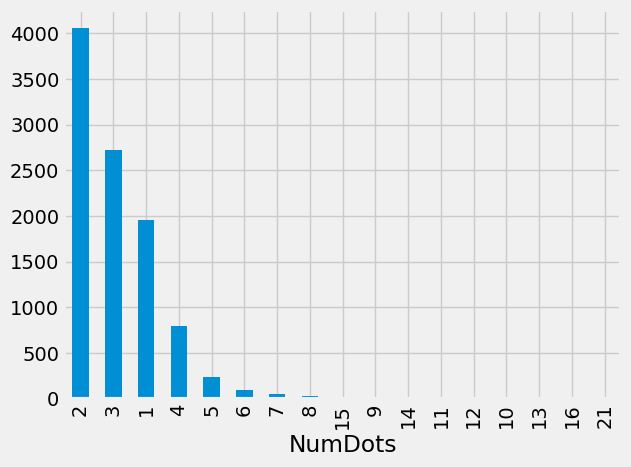

In [19]:
df['NumDots'].value_counts().plot(kind='bar')

<h5>

    More than three dots could still be legitimate if the website uses additional subdomains, but it's something to be cautious about. Many phishing sites tend to add unnecessary subdomains or lengthy URLs to mimic real websites
</h5>

In [20]:
df['SubdomainLevel'].value_counts()

SubdomainLevel
0     4835
1     4790
2      272
4       30
6       26
3       22
7        7
5        6
8        5
9        3
11       2
14       1
10       1
Name: count, dtype: int64

In [21]:
df.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

In [22]:
# Average and min and max url length
df[df['UrlLength']>=df['UrlLength'].mean()].head(5)

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.0,0.250000,1,1,0,0,0,0.000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.0,0.000000,0,1,0,0,0,0.000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.0,0.095238,1,1,0,0,0,0.000,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
8,8,7,2,76,1,1,0,0,0,0,0,0,0,2,1,1,0,1,1,0,65,4,0,0,0,0,0.0,0.000000,0,1,0,0,0,0.975,0,0,0,0,0,0,0,0,-1,-1,1,1,1,-1,1
15,3,0,4,73,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,33,33,0,0,1,0,1.0,0.076923,0,1,1,0,0,0.000,0,0,0,0,0,0,0,0,1,0,1,1,0,-1,1


In [23]:
df[df['UrlLength']==df['UrlLength'].max()]

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
2144,15,0,4,253,0,0,0,0,0,0,6,12,1,74,1,0,0,0,0,0,17,29,174,0,0,0,0.0,0.642857,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,-1,1,0,1,1


In [24]:
df[df['UrlLength']==df['UrlLength'].min()]

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
5016,1,0,0,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0,0,1.0,0.5,1,0,0,0,0,0.0,1,0,0,0,0,0,0,0,1,1,1,1,-1,-1,0


In [25]:
# Higher the number of url length the higher the chance of being phishing


Text(0, 0.5, 'Number of brand')

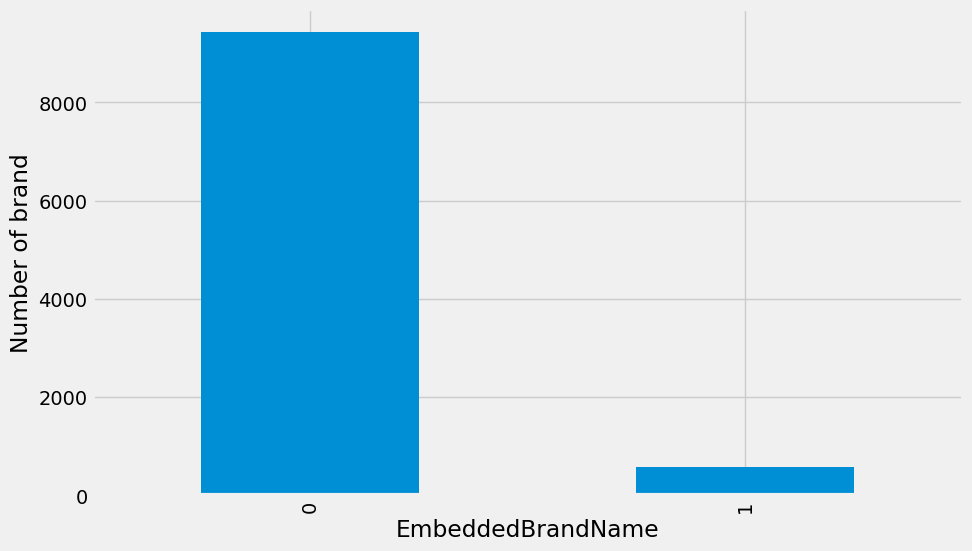

In [64]:
plt.figure(figsize=(10,6))
df['EmbeddedBrandName'].value_counts().plot(kind='bar')
plt.ylabel("Number of brand")
# majority of url not contain brand name

<Axes: xlabel='PctExtResourceUrls', ylabel='Count'>

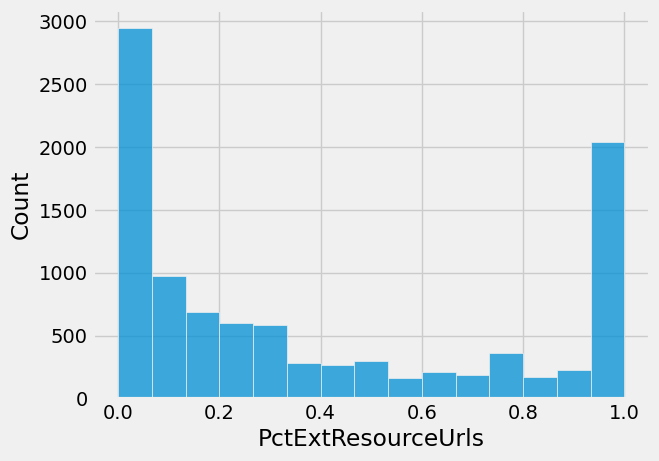

In [47]:
sns.histplot(df["PctExtResourceUrls"])

In [49]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


Text(0, 0.5, 'Path Count')

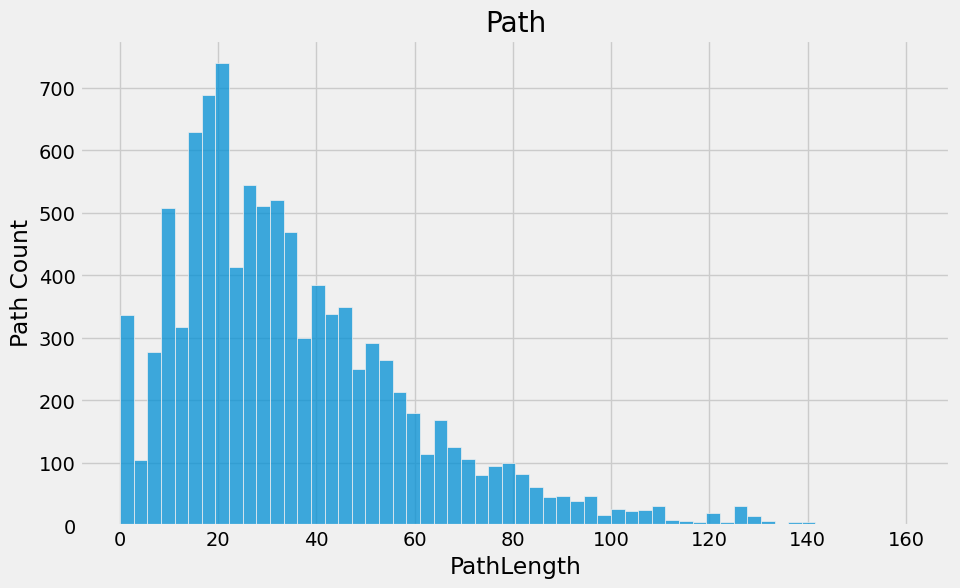

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(df["PathLength"])
plt.title("Path")
plt.ylabel("Path Count")

<Axes: xlabel='NumNumericChars', ylabel='Count'>

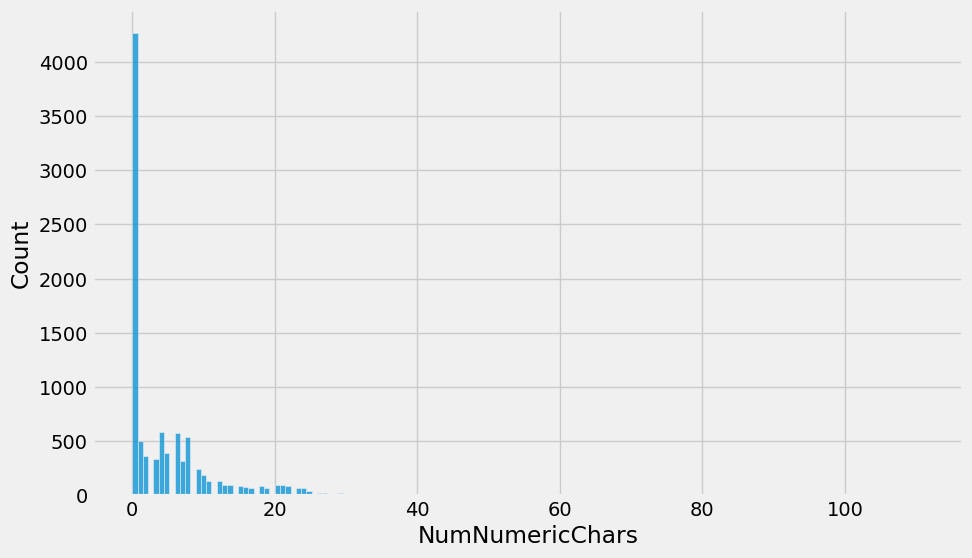

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(df["NumNumericChars"])

## **2.Bar plot**